In [3]:
# Load Bibliothenken
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Laden der Beispielsdatei

Es wird eine Beispielsdate verwendet in welcher meine Stimme aufgenommen wurde mit dem Satz auf schweizerdeutsch. "Hallo min Name isch Christian"

In [4]:
hallo_file = "audio/Hallo.wav"

In [5]:
ipd.Audio(hallo_file)

In [6]:
# laden des Files mithilfe Librosa Bibliothek
hallo, sr = librosa.load(hallo_file)

## Visualisierung der Audio-Wellenform

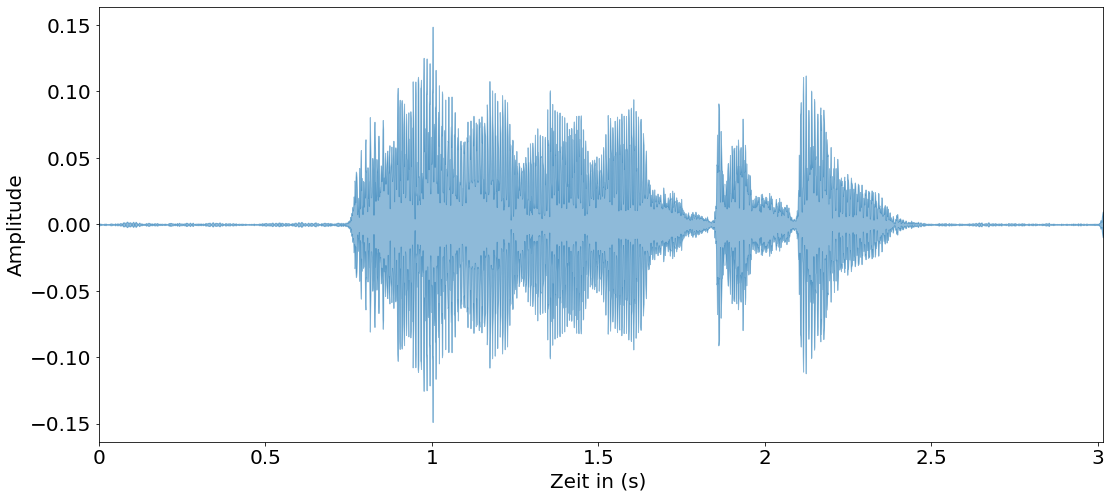

In [30]:
# Plot Wellenform
plt.figure(figsize=(18, 8))
librosa.display.waveplot(hallo, sr=sr, alpha=0.5)
plt.xlabel('Zeit in (s) ', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [10]:
# Fast Fourier Transformation
ft = sp.fft.fft(hallo)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) 

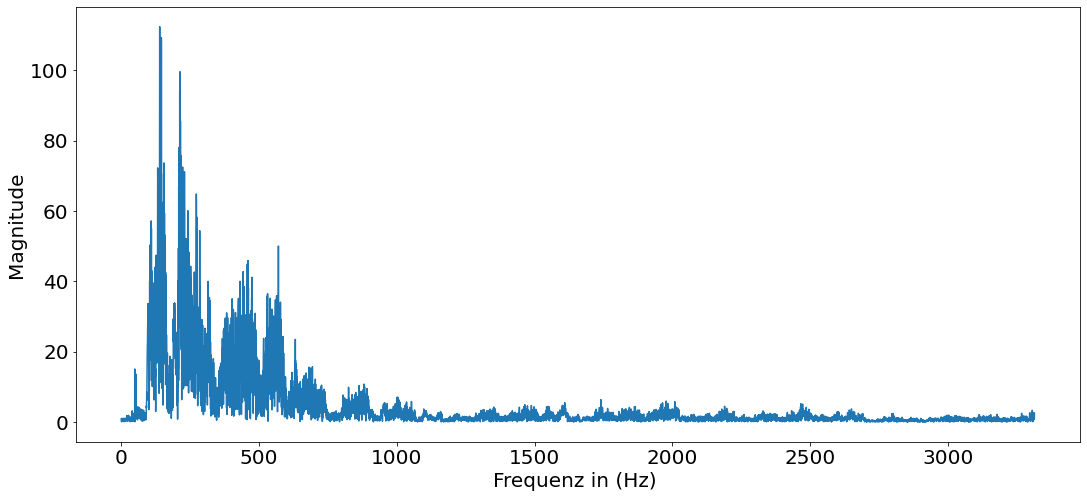

In [32]:
# Plot Spektrum 
plt.figure(figsize=(18, 8))
plt.plot(frequency[:10000], magnitude[:10000]) # Magnituden Spektrum
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('Frequenz in (Hz) ', fontsize=20)
plt.ylabel('Magnitude', fontsize=20)
plt.show()

In [12]:
# Samplerate
len(hallo)

66528

## Extrahierung der Short-Time Fourier Transformation

In [14]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [15]:
S_scale = librosa.stft(hallo, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [16]:
S_scale.shape

(1025, 130)

In [17]:
type(S_scale[0][0])

numpy.complex64

## Berechnung des Spektrogramm

In [18]:
Y_scale = np.abs(S_scale) ** 2

In [19]:
Y_scale.shape

(1025, 130)

In [20]:
type(Y_scale[0][0])

numpy.float32

## Visualisiurung des Spektrogramm

In [21]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

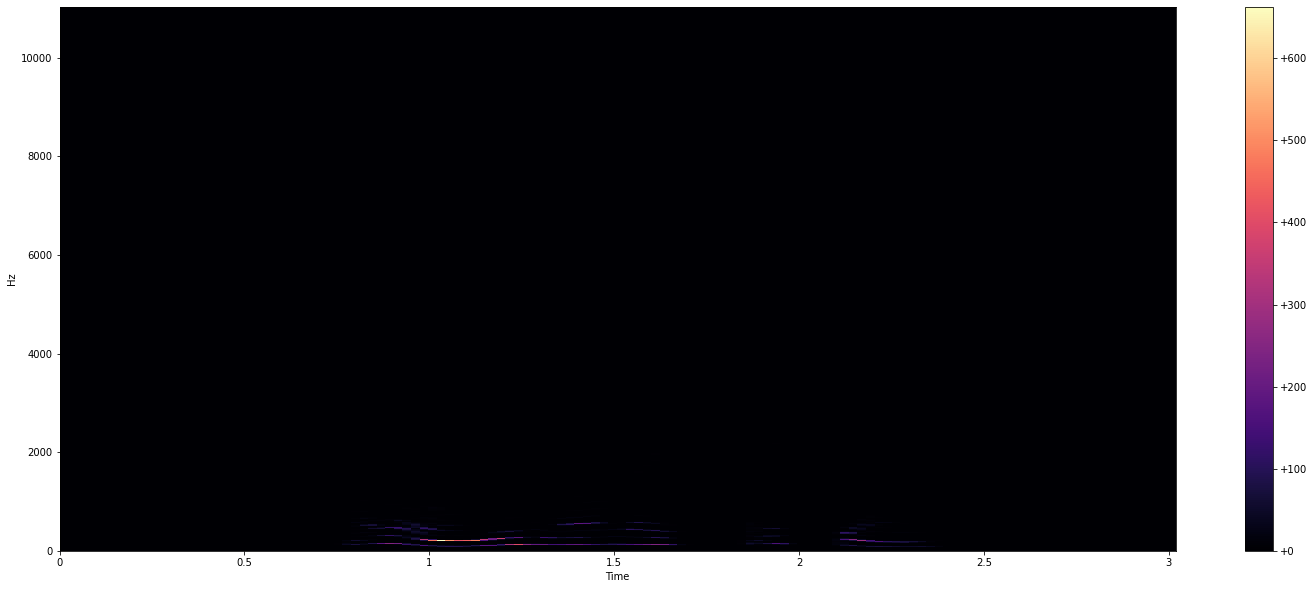

In [22]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

## Log-Amplituden Spektrogramm

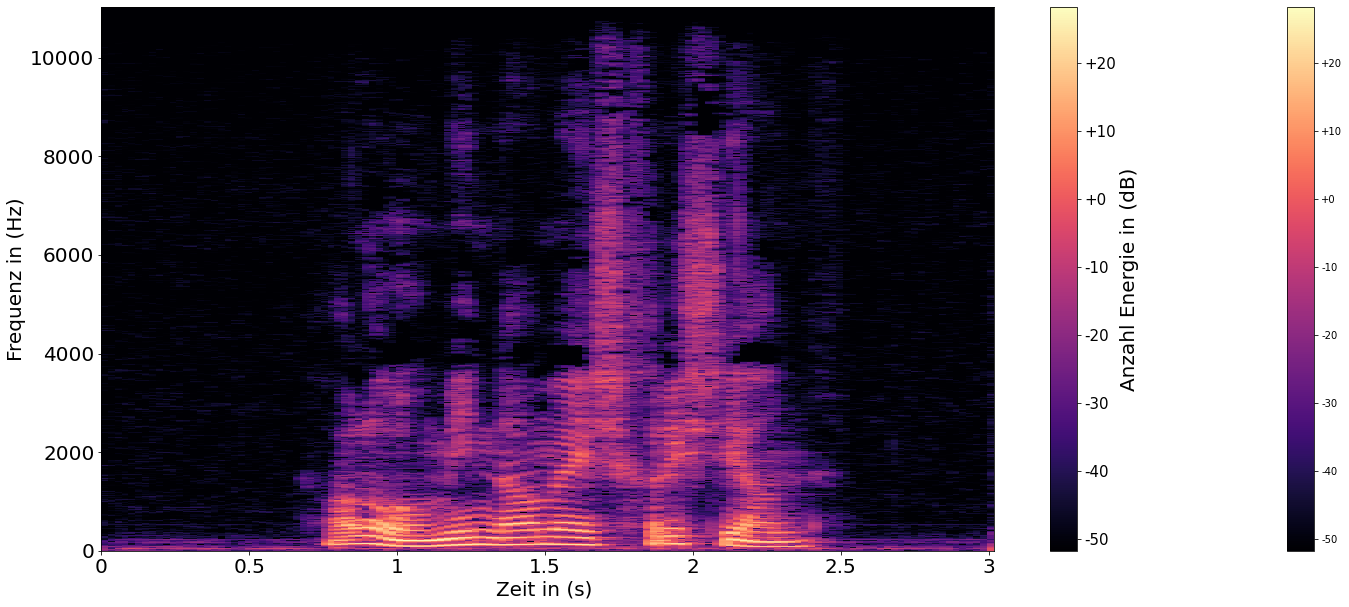

In [35]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)
cbar = plt.colorbar(format="%+2.f")
plt.xlabel('Zeit in (s) ', fontsize=20)
plt.ylabel('Frequenz in (Hz)', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('Anzahl Energie in (dB)', fontsize=20)

## Log-Frequenz Spektrogramm

/usr/local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


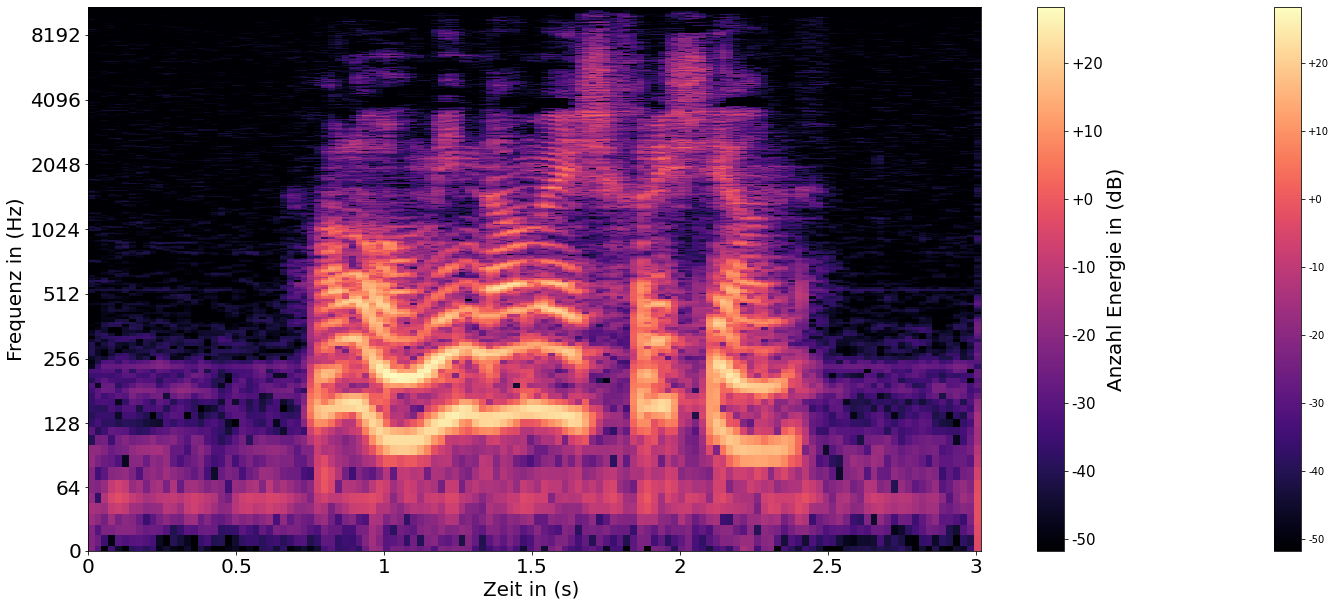

In [36]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")
cbar = plt.colorbar(format="%+2.f")
plt.xlabel('Zeit in (s) ', fontsize=20)
plt.ylabel('Frequenz in (Hz)', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('Anzahl Energie in (dB)', fontsize=20)